In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [7]:
df = pd.read_csv('TESLA.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [11]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100


In [13]:
print(df.isnull())

      Date   Open   High    Low  Close  Adj Close  Volume
0    False  False  False  False  False      False   False
1    False  False  False  False  False      False   False
2    False  False  False  False  False      False   False
3    False  False  False  False  False      False   False
4    False  False  False  False  False      False   False
..     ...    ...    ...    ...    ...        ...     ...
248  False  False  False  False  False      False   False
249  False  False  False  False  False      False   False
250  False  False  False  False  False      False   False
251  False  False  False  False  False      False   False
252  False  False  False  False  False      False   False

[253 rows x 7 columns]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [17]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()
df = df.dropna()

In [21]:
data = df[['Close']].copy()
N = 5
for i in range(1, N + 1):
    data[f'lag_{i}'] = data['Close'].shift(i)
data.dropna(inplace=True)

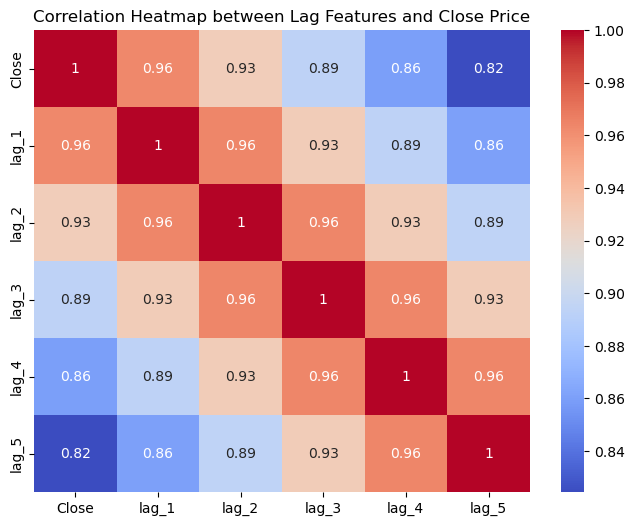

In [23]:
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap between Lag Features and Close Price")
plt.show()

In [25]:
X = data.drop('Close', axis=1).values
y = data['Close'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [33]:
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, lr_pred))
print("R2:", r2_score(y_test, lr_pred))

Linear Regression
MSE: 75.13342835410982
R2: 0.555911155811412


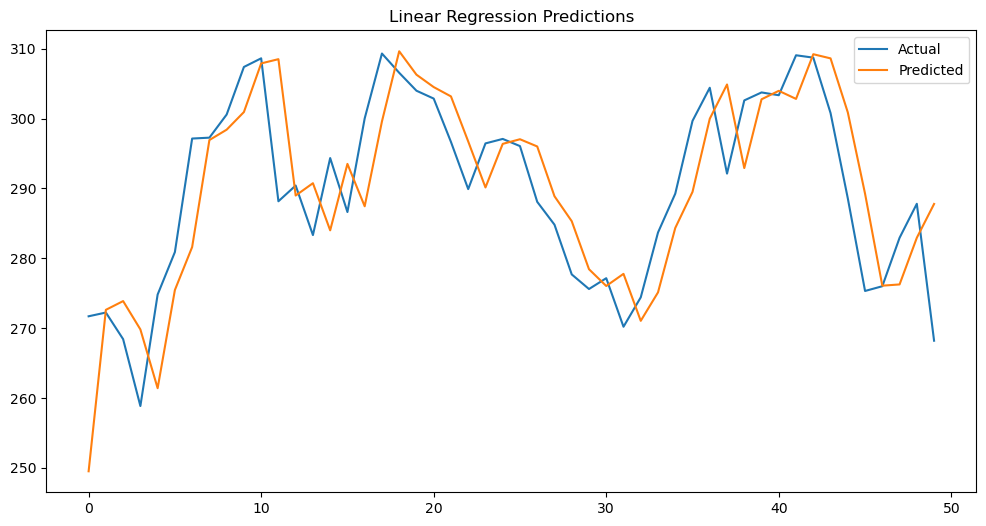

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(lr_pred, label='Predicted')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

In [37]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest")
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R2:", r2_score(y_test, rf_pred))

Random Forest
MSE: 119.78418704801855
R2: 0.29199528966636856


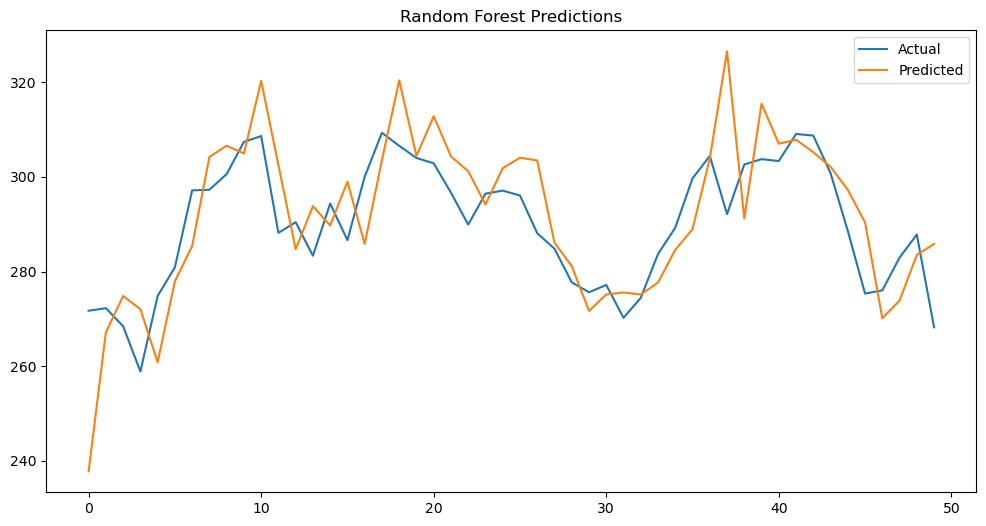

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(rf_pred, label='Predicted')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

In [41]:
#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost")
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("R2:", r2_score(y_test, xgb_pred))

XGBoost
MSE: 110.42788456305153
R2: 0.34729729900427375


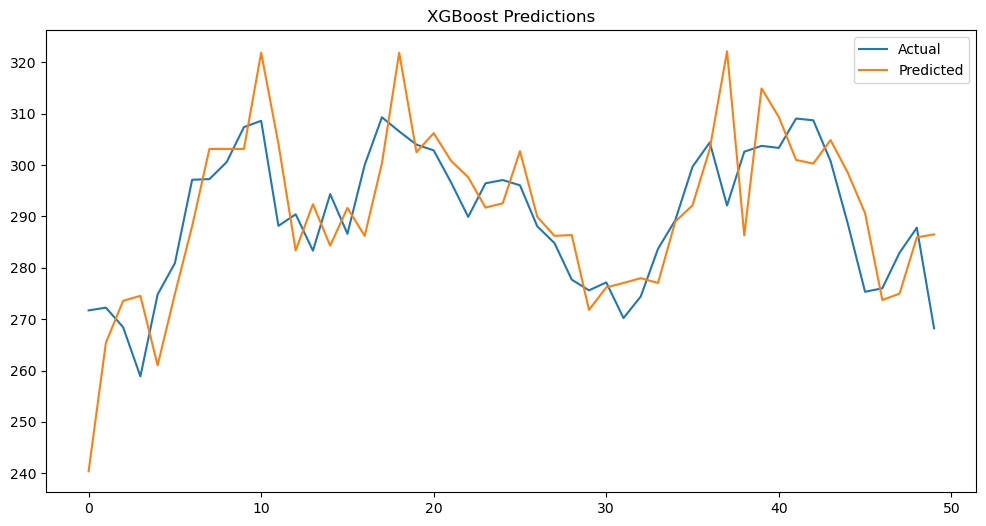

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(xgb_pred, label='Predicted')
plt.title('XGBoost Predictions')
plt.legend()
plt.show()

In [45]:
#KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNN Regressor")
print("MSE:", mean_squared_error(y_test, knn_pred))
print("R2:", r2_score(y_test, knn_pred))

KNN Regressor
MSE: 141.7724257017858
R2: 0.162030083720057


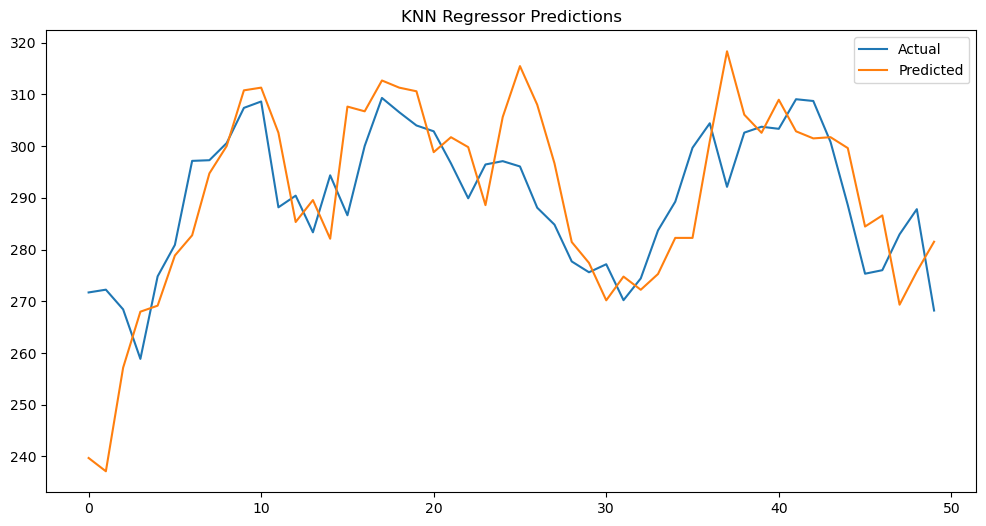

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(knn_pred, label='Predicted')
plt.title('KNN Regressor Predictions')
plt.legend()
plt.show()

In [49]:
#Support Vector Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

print("Support Vector Regressor")
print("MSE:", mean_squared_error(y_test, svr_pred))
print("R2:", r2_score(y_test, svr_pred))

Support Vector Regressor
MSE: 118.93562137086089
R2: 0.2970108807160806


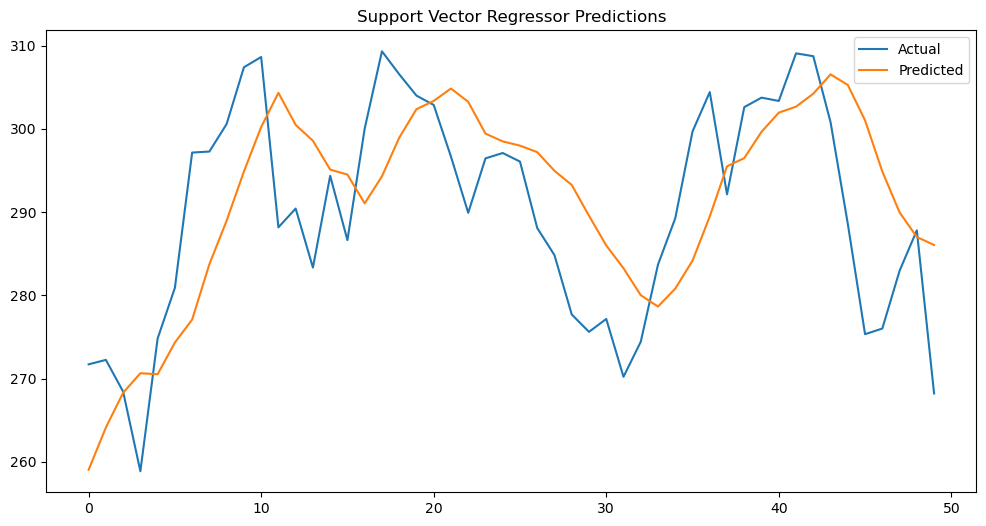

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(svr_pred, label='Predicted')
plt.title('Support Vector Regressor Predictions')
plt.legend()
plt.show()

In [53]:
#Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Regressor")
print("MSE:", mean_squared_error(y_test, dt_pred))
print("R2:", r2_score(y_test, dt_pred))

Decision Tree Regressor
MSE: 226.94116253219323
R2: -0.3413741496360634


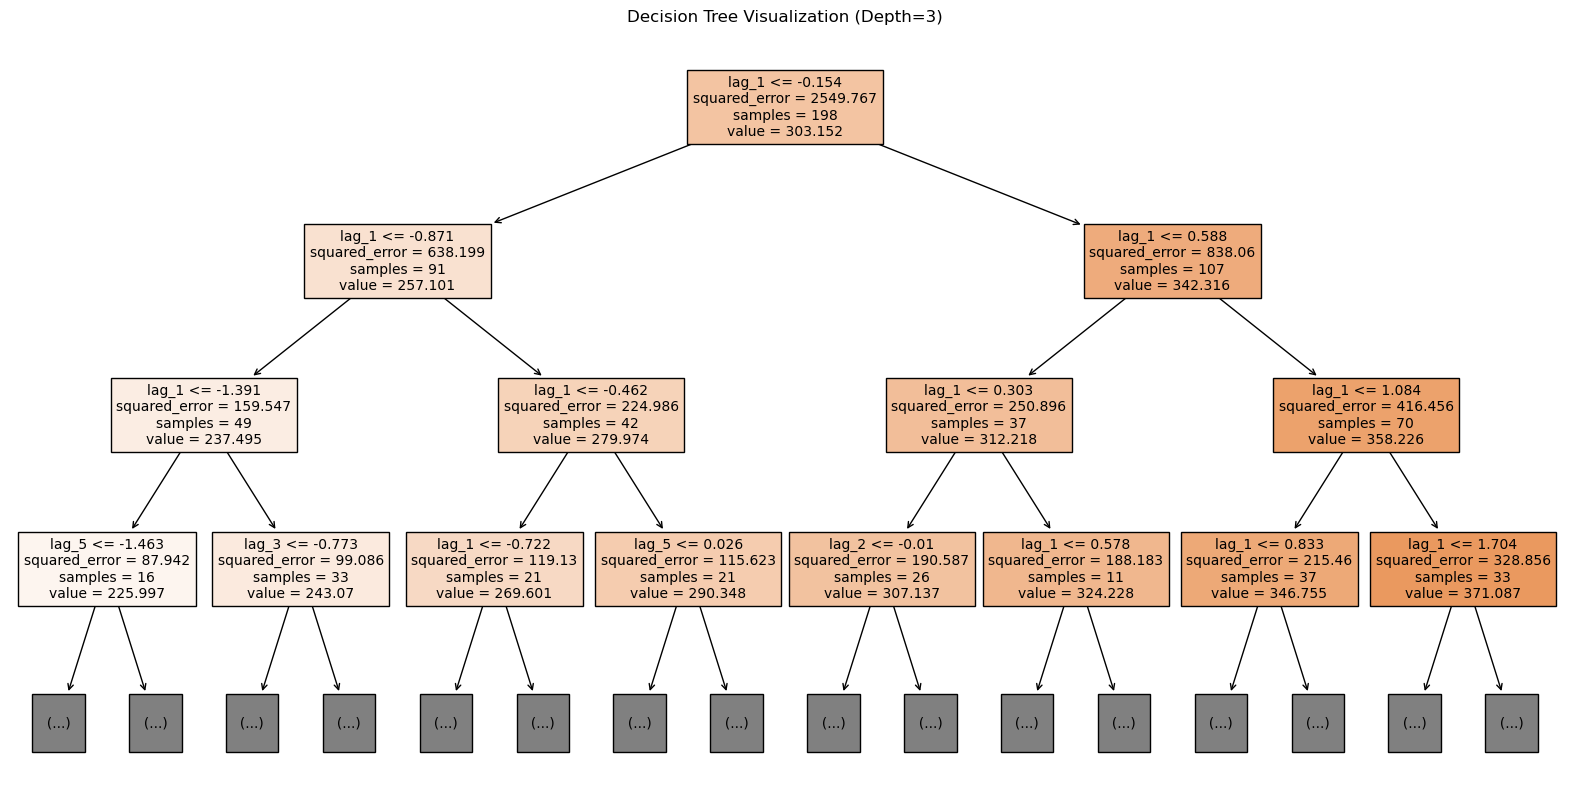

In [55]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=data.drop('Close', axis=1).columns, max_depth=3, fontsize=10)
plt.title('Decision Tree Visualization (Depth=3)')
plt.show()